For this simple neural network with 3 inputs and 2 outputs:

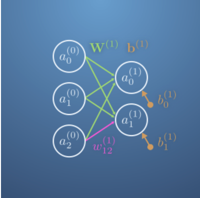

$$\alpha^{(1)} = \sigma(W^{(1)}\alpha^{(0)}+b^{(1)})$$

$$
 \alpha^{(0)} = \left[
 \begin{matrix}
   \alpha^{(0)}_{0}\\
   \alpha^{(0)}_{1}\\
   \alpha^{(0)}_{2}
  \end{matrix}
  \right] 
$$

$$
 W^{(1)} = \left[
 \begin{matrix}
   W_{1,1} & W_{1,2} & W_{1,3} \\
   W_{2,1} & W_{2,2} & W_{2,3} 
  \end{matrix}
  \right] 
$$

$$
 \alpha^{(1)} = \left[
 \begin{matrix}
   \alpha^{(1)}_{0}\\
   \alpha^{(1)}_{1}
  \end{matrix}
  \right] 
$$

$$ 
 b^{(1)} = \left[
 \begin{matrix}
   b^{(1)}_{0}\\
   b^{(1)}_{1}
  \end{matrix}
  \right] 
$$

In [7]:
import numpy as np
# First set up the network.
sigma = np.tanh
W = np.array([[-2, 4, -1],[6, 0, -3]])
b = np.array([0.1, -2.5])
# Define our input vector
x = np.array([0.3, 0.4, 0.1])

$$
 W^{(1)} = \left[
 \begin{matrix}
   -2 & 4 & -1 \\
   6 & 0 & -3
  \end{matrix}
  \right]
$$

$$ 
 b^{(1)} = \left[
 \begin{matrix}
   0.1\\
   -2.5
  \end{matrix}
  \right] 
$$

$$
 \alpha^{(0)} = \left[
 \begin{matrix}
   0.3\\
   0.4\\
   0.1
  \end{matrix}
  \right] 
$$



$$\alpha^{(1)} = \sigma  (\left[ \begin{matrix}-2 & 4 & -1 \\6 & 0 & -3\end{matrix}\right] \times \left[\begin{matrix}0.3\\0.4\\0.1\end{matrix}\right] + \left[\begin{matrix} 0.1\\-2.5\end{matrix}\right]) $$

In [29]:
def cal_a1(input):
  a1_0 = sigma((W.dot(x) + b)[0])
  a1_1 = sigma((W.dot(x) + b)[1])
  a1 = np.array([a1_0, a1_1])
  return a1

cal_a1(x)

array([ 0.76159416, -0.76159416])

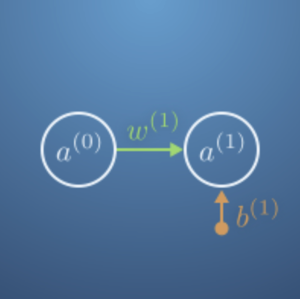

For this two-node network, the activation equations are:
$$ \alpha^{(1)} = \sigma(z^{(1)})$$

Where we've introduced $z^{(1)}$ as the weighted sum of activation and bias.

$$ z^{(1)} = \omega^{(1)}\alpha^{(0)} + b^{(1)} $$


We can formalise how good (or bad) our neural network is at getting the desired behaviour. For a particular input, $x$, and desired output $y$, we can define the cost of that specific training example as the square of the difference between the network's output and the desired output, that is,

$$ C_{k} = (\alpha^{(1)} - y)^{2} $$

Where $k$ labels the training example and $a^{(1)}$ is assumed to be the activation of the output neuron when the input neuron $a^{(0)}$ is set to $x$

In [34]:
# for example
w1 = 1.3
b1 = -0.1

# Then we define the neuron activation.
def a1(a0) :
  z = w1 * a0 + b1
  return sigma(z)

# Experiment with different values of x below.
x = 0
a1(x)

print(f'Cost:{round((a1(x)-1)**2,2)}')

Cost:1.21


The cost function of a training set is the average of the individual cost functions of the data in the training set. 

$$ C = \frac{1}{N}\sum_{k}C_{k}$$

To improve the performance of the neural network on the training data, we can vary the weight and bias. We can calculate the derivative of the example cost with respect to these quantities using the chain rule.

$$ \frac{\partial C_{k}}{\partial \omega^{(1)}} = \frac{\partial C_{k}}{\partial \alpha^{(1)}} \frac{\partial \alpha^{(1)}}{\partial z^{(1)}} \frac{\partial z^{(1)}}{\partial \omega^{(1)}} $$

$$ \frac{\partial C_{k}}{\partial b^{(1)}} = \frac{\partial C_{k}}{\partial \alpha^{(1)}} \frac{\partial \alpha^{(1)}}{\partial z^{(1)}} \frac{\partial z^{(1)}}{\partial b^{(1)}} $$

$$ \alpha^{(1)} = \sigma(z^{(1)})$$

$$ z^{(1)} = \omega^{(1)}\alpha^{(0)} + b^{(1)} $$

$$ C_{k} = (\alpha^{(1)} - y)^{2} $$

$$ \frac{d}{dz}tanh(z) = \frac{1}{cosh^{2}z} $$

In [36]:
# Define the feed-forward equation.
def a1(w1, b1, a0):
  z = w1 * a0 + b1
  return sigma(z)
"""
The individual cost function is the square of the difference between the network output 
and the training data output.
"""
def C(w1, b1, x, y):
  return (a1(w1, b1, x) - y)**2

# This function returns the derivative of the cost function with respect to the weight.
def dCdw (w1, b1, x, y) :
  z = w1 * x + b1
  dCda = 2 * (a1(w1, b1, x) - y) # Derivative of cost with activation
  dadz = 1/np.cosh(z)**2 # derivative of activation with weighted sum z
  dzdw = x # derivative of weighted sum z with weight
  return dCda * dadz * dzdw # Return the chain rule product.

# This function returns the derivative of the cost function with respect to the bias.
def dCdb (w1, b1, x, y) :
  z = w1 * x + b1
  dCda = 2 * (a1(w1, b1, x) - y)
  dadz = 1/np.cosh(z)**2
  dzdb = 1
  return dCda * dadz * dzdb

In [37]:
# Let's start with an unfit weight and bias.
w1 = 2.3
b1 = -1.2
# We can test on a single data point pair of x and y.
x = 0
y = 1
# Output how the cost would change
# in proportion to a small change in the bias
print(dCdb(w1, b1, x, y))

-1.1186026425530913


In [38]:
print(dCdw(w1, b1, x, y))

-0.0


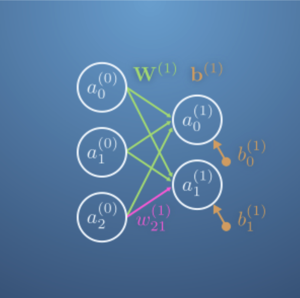

$$\alpha^{(1)}=σ(z^{(1)})$$

$$z^{(1)}=W^{(1)}\alpha^{(0)}+b^{(1)}$$

$$ C_{k} = \sum_{i}(\alpha^{(1)}_{i} - y_{i})^{2} $$

Note here that $i$ labels the output neuron and is summed over, whereas $k$ labels the training example.

In [41]:
# Let's use a random initial weight and bias.
W = np.array([[-0.94529712, -0.2667356 , -0.91219181],
              [ 2.05529992,  1.21797092,  0.22914497]])
b = np.array([ 0.61273249,  1.6422662 ])

# define our feed forward function
def a1 (a0) :
  # Notice the next line is almost the same as previously,
  # except we are using matrix multiplication rather than scalar multiplication
  # hence the '@' operator, and not the '*' operator.
  z = W @ a0 + b
  # Everything else is the same though,
  return sigma(z)

# Next, if a training example is,
x = np.array([0.7, 0.6, 0.2])
y = np.array([0.9, 0.6])

# Then the cost function is,
d = a1(x) - y # Vector difference between observed and expected activation
C = d @ d # Absolute value squared of the difference.
print(C)

1.7788340952508737


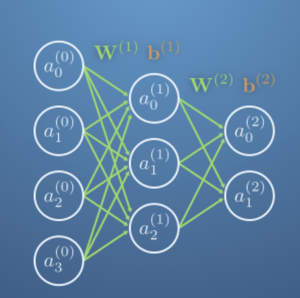

Training this network is done by back-propagation because we start at the output layer and calculate derivatives backwards towards the input layer with the chain rule.

If we wanted to calculate the derivative of the cost with respect to the weights of the final layer, then this is the same as previously (but now in vector form):

$$ \frac{\partial C_{k}}{\partial W^{(2)}} = \frac{\partial C_{k}}{\partial \alpha^{(2)}} \frac{\partial \alpha^{(2)}}{\partial z^{(2)}} \frac{\partial z^{(2)}}{\partial W^{(2)}} $$

A similar expression can be constructed for the biases.If we want to calculate the derivative of the cost with respects to weights of the previous layer, we use the expression:
$$ \frac{\partial C_{k}}{\partial W^{(1)}} = \frac{\partial C_{k}}{\partial \alpha^{(2)}} \frac{\partial \alpha^{(2)}}{\partial \alpha^{(1)}} \frac{\partial \alpha^{(1)}}{\partial z^{(1)}} \frac{\partial z^{(1)}}{\partial W^{(1)}} $$

$$ \frac{\partial \alpha^{(2)}}{\partial \alpha^{(1)}} = \frac{\partial \alpha^{(2)}}{\partial z^{(2)}} \frac{\partial z^{(2)}}{\partial \alpha^{(1)}} $$

This can be generalised to any layer:

$$ \frac{\partial C_{k}}{\partial W^{(i)}} = \frac{\partial C_{k}}{\partial \alpha^{(N)}} \frac{\partial \alpha^{(N)}}{\partial \alpha^{(N-1)}} \frac{\partial \alpha^{(N-1)}}{\partial \alpha^{(N-2)}}  ... \frac{\partial \alpha^{(i+1)}}{\partial \alpha^{(i)}}  \frac{\partial \alpha^{(i)}}{\partial z^{(i)}} \frac{\partial z^{(i)}}{\partial W^{(i)}} $$